In [159]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats

In [160]:
df = pd.read_csv('ThoracicSurgery.csv')
df.head()

,id,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor Size,Diabetes Mellitus,Heart Attack in 6 mos,PAD,Smoking,Asthma,Age,DeathIn1yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [161]:
df['Tumor Size'].unique()

array(['OC14', 'OC12', 'OC11', 'OC13'], dtype=object)

In [162]:
df.shape

(470, 18)

In [163]:
df.columns

Index(['id', 'Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor Size', 'Diabetes Mellitus',
       'Heart Attack in 6 mos', 'PAD', 'Smoking ', 'Asthma', 'Age',
       'DeathIn1yr'],
      dtype='object')

In [164]:
df.describe()

,id,FVC,FEV1,Age
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
id                       470 non-null int64
Diagnosis                470 non-null object
FVC                      470 non-null float64
FEV1                     470 non-null float64
Performance              470 non-null object
Pain                     470 non-null object
Haemoptysis              470 non-null object
Dyspnoea                 470 non-null object
Cough                    470 non-null object
Weakness                 470 non-null object
Tumor Size               470 non-null object
Diabetes Mellitus        470 non-null object
Heart Attack in 6 mos    470 non-null object
PAD                      470 non-null object
Smoking                  470 non-null object
Asthma                   470 non-null object
Age                      470 non-null int64
DeathIn1yr               470 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


# Observation:

- Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Diabetes Mellitus,Heart Attack in 6 mos,PAD,Smoking,Asthma,DeathIn1yr - Categorical
- FVC,FEV1,Age - Numerical

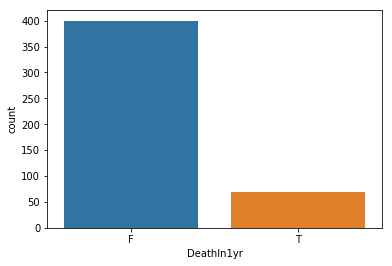

In [166]:
sns.countplot(df['DeathIn1yr'])


In [167]:
df['DeathIn1yr'].value_counts(normalize=True)

F    0.851064
T    0.148936
Name: DeathIn1yr, dtype: float64

In [168]:
df['DeathIn1yr'].value_counts().mean()

235.0

In [169]:
df['Smoking '].value_counts(normalize=True)

T    0.821277
F    0.178723
Name: Smoking , dtype: float64

In [170]:
df['Cough'].value_counts(normalize=True)

T    0.687234
F    0.312766
Name: Cough, dtype: float64

85% survived 1 year and 15% died within a year.

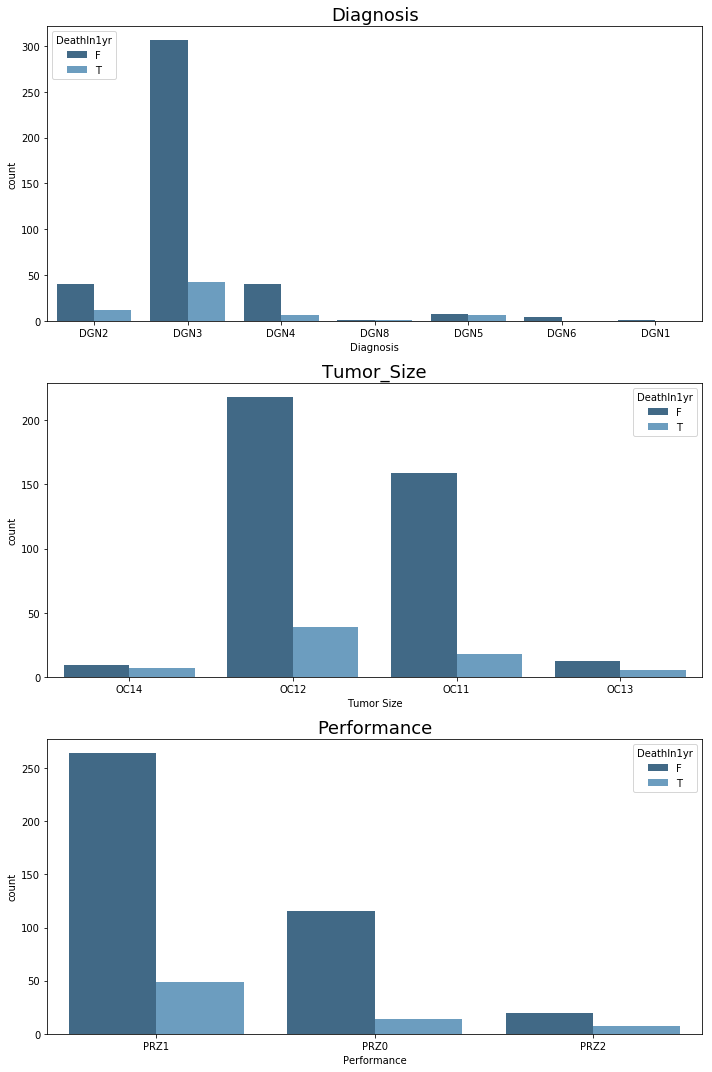

In [171]:
fig, axes = plt.subplots(3,1,figsize=(10,15))
sns.countplot(x='Diagnosis', hue='DeathIn1yr', data=df, palette='Blues_d',ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor Size', hue='DeathIn1yr', data=df, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='DeathIn1yr', data=df, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

DeathIn1yr           F   T
Diabetes Mellitus         
F                  375  60
T                   25  10


Text(0.5, 1.0, 'Diabetes Vs DeathInyr')

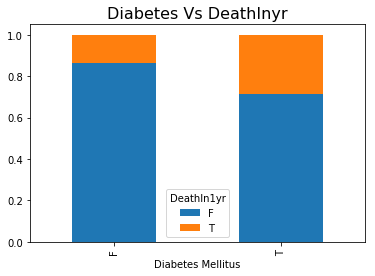

In [172]:
tab = pd.crosstab(df['Diabetes Mellitus'], df['DeathIn1yr'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Diabetes Vs DeathInyr', fontsize=16)


DeathIn1yr               F   T
Heart Attack in 6 mos         
F                      398  70
T                        2   0


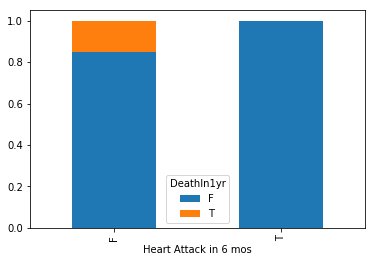

In [173]:
tab = pd.crosstab(df['Heart Attack in 6 mos'], df['DeathIn1yr'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


DeathIn1yr    F   T
Asthma             
F           398  70
T             2   0


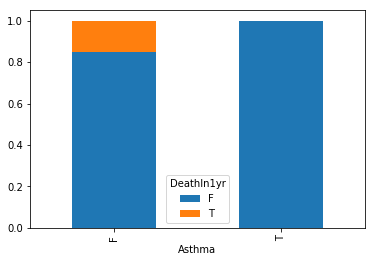

In [174]:
tab = pd.crosstab(df['Asthma'], df['DeathIn1yr'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


In [175]:
df.drop(['id'],inplace=True,axis=1)
corr=df.corr()
corr


,FVC,FEV1,Age
FVC,1.000000,0.032975,-0.290178
FEV1,0.032975,1.000000,-0.115900
Age,-0.290178,-0.115900,1.000000


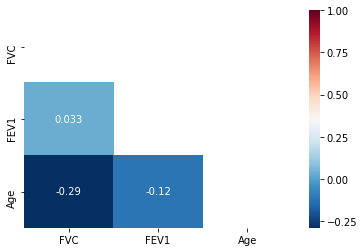

In [176]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

sns.heatmap(corr,annot=True, mask=mask, cmap='RdBu_r') 
plt.show() 

In [177]:
# Correlation coefficients for FVC and FEV1
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.032975265423997376

In [178]:
# Correlation coefficients for Age and FVC
np.corrcoef(df.Age, df.FVC)[0,1]

-0.2901778375988776

In [179]:
# Correlation coefficients for Age and FEV1
np.corrcoef(df.Age, df.FEV1)[0,1]

-0.1159000014724894

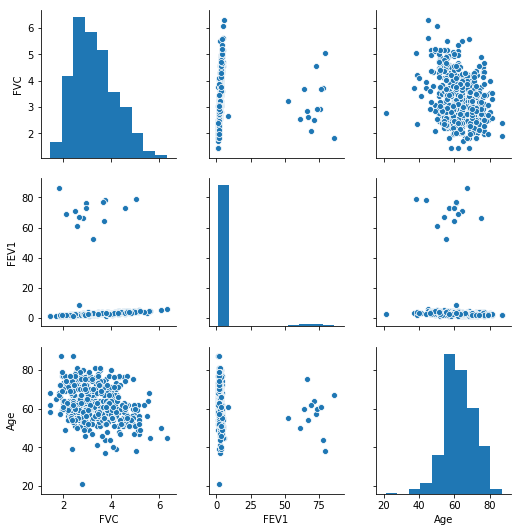

In [180]:
sns.pairplot(df)

Dyspnoea      F   T
DeathIn1yr         
F           378  22
T            61   9


Text(0.5, 1.0, 'DeathInyr vs Dyspnoea')

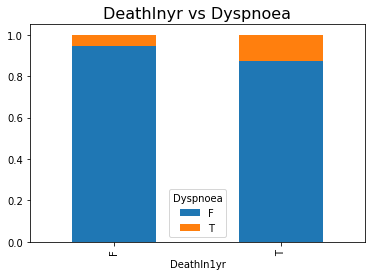

In [181]:
tab = pd.crosstab(df['DeathIn1yr'], df['Dyspnoea'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathInyr vs Dyspnoea', fontsize=16)


Pain          F   T
DeathIn1yr         
F           376  24
T            63   7


Text(0.5, 1.0, 'DeathInyr Vs Pain')

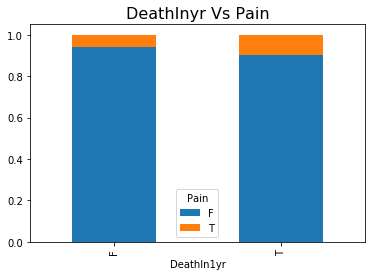

In [182]:
tab = pd.crosstab(df['DeathIn1yr'], df['Pain'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathInyr Vs Pain', fontsize=16)

Haemoptysis    F   T
DeathIn1yr          
F            346  54
T             56  14


Text(0.5, 1.0, 'DeathInyr vs Haemopytsis')

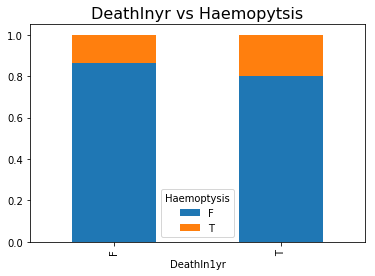

In [183]:
tab = pd.crosstab(df['DeathIn1yr'], df['Haemoptysis'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathInyr vs Haemopytsis', fontsize=16)


Cough         F    T
DeathIn1yr          
F           132  268
T            15   55


Text(0.5, 1.0, 'DeathIn1yr Vs Cough')

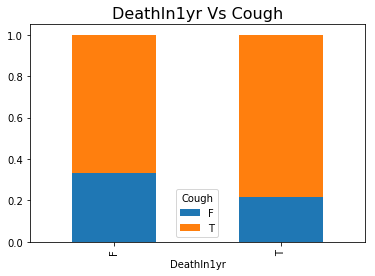

In [184]:
tab = pd.crosstab(df['DeathIn1yr'], df['Cough'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathIn1yr Vs Cough', fontsize=16)

Smoking      F    T
DeathIn1yr         
F           77  323
T            7   63


Text(0.5, 1.0, 'DeathIn1yr Vs Smoking')

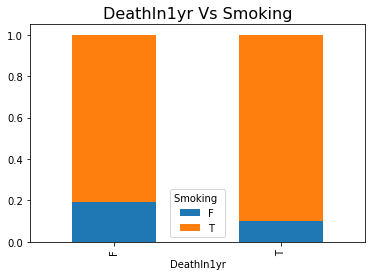

In [185]:
tab = pd.crosstab(df['DeathIn1yr'], df['Smoking '])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('DeathIn1yr Vs Smoking', fontsize=16)

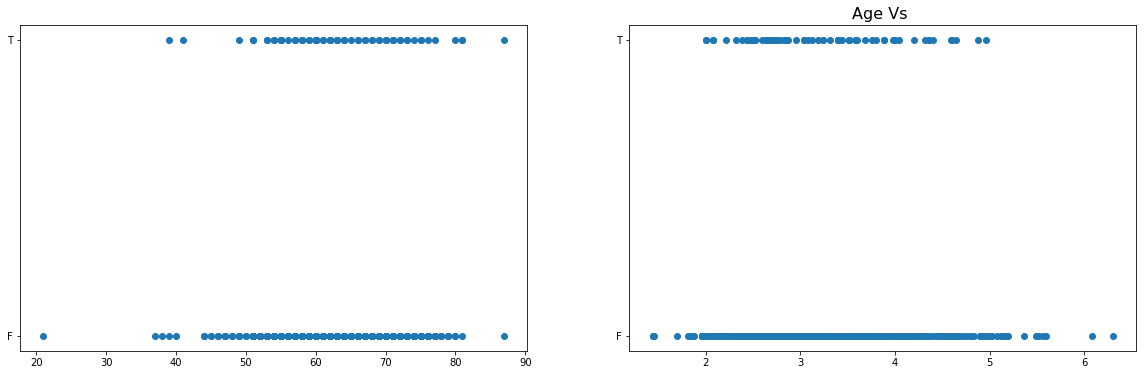

In [186]:
fig, (axes1, axes2) = plt.subplots(1,2, figsize = (20 , 6)) 
axes1.scatter(y = df.DeathIn1yr, x = df.Age)    
axes2.scatter(x = df.FVC, y = df.DeathIn1yr) 
plt.title('Age Vs ', fontsize=16)
plt.show() 

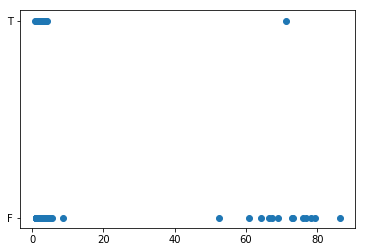

In [187]:
plt.scatter(x = df.FEV1, y = df.DeathIn1yr) 
plt.show() 

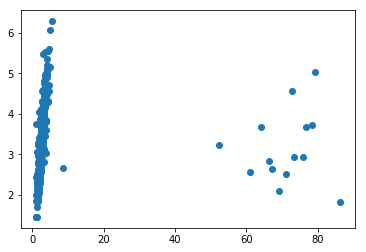

In [188]:
plt.scatter(x = df.FEV1, y = df.FVC) 
plt.show() 

In [189]:
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.032975265423997376

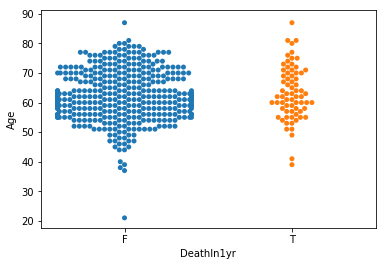

In [190]:
sns.swarmplot(y=df.Age,data=df,x=df.DeathIn1yr)
plt.show()

In [191]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor Size', 'Diabetes Mellitus',
       'Heart Attack in 6 mos', 'PAD', 'Smoking ', 'Asthma', 'Age',
       'DeathIn1yr'],
      dtype='object')

<Figure size 1080x360 with 0 Axes>

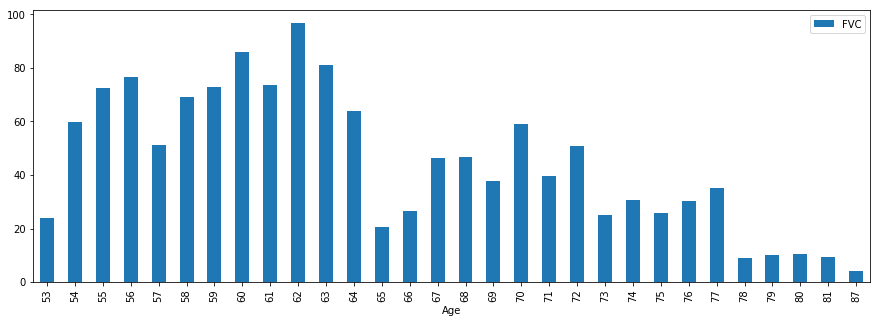

In [192]:
figure = plt.figure(figsize=(15,5))
df.groupby(by=['Age'])['FVC'].sum().reset_index().sort_values(['Age'],
                    ascending=True).tail(30).plot(x='Age',y='FVC',kind='bar', figsize=(15,5))

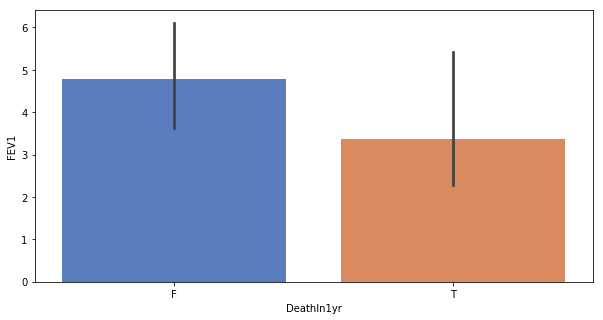

In [193]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='DeathIn1yr', y='FEV1', data=df,palette='muted');

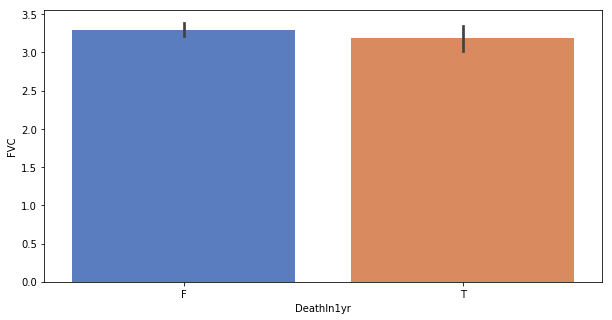

In [194]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='DeathIn1yr', y='FVC', data=df,palette='muted');

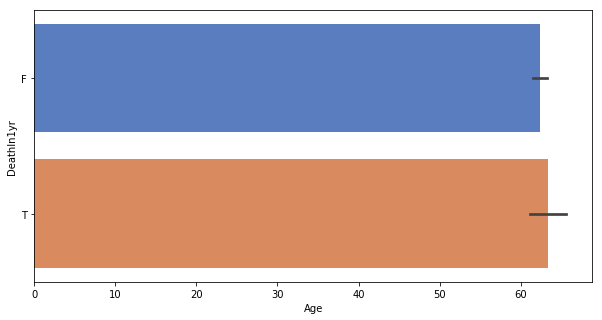

In [195]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Age', y='DeathIn1yr', data=df,palette='muted');

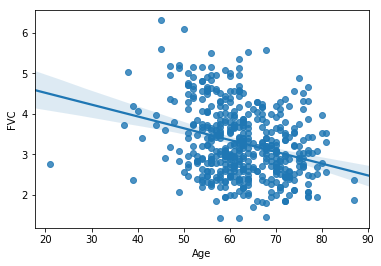

In [196]:
sns.regplot(x='Age',y='FVC',data=df)

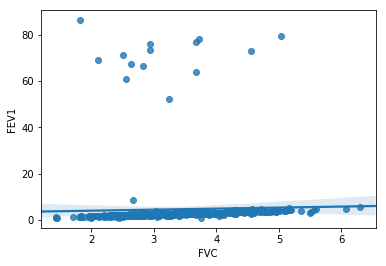

In [197]:
sns.regplot(x='FVC',y='FEV1',data=df)

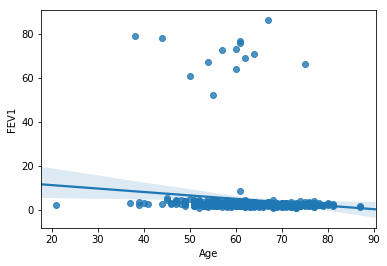

In [198]:
sns.regplot(x='Age',y='FEV1',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED796A3780>,
      dtype=object)

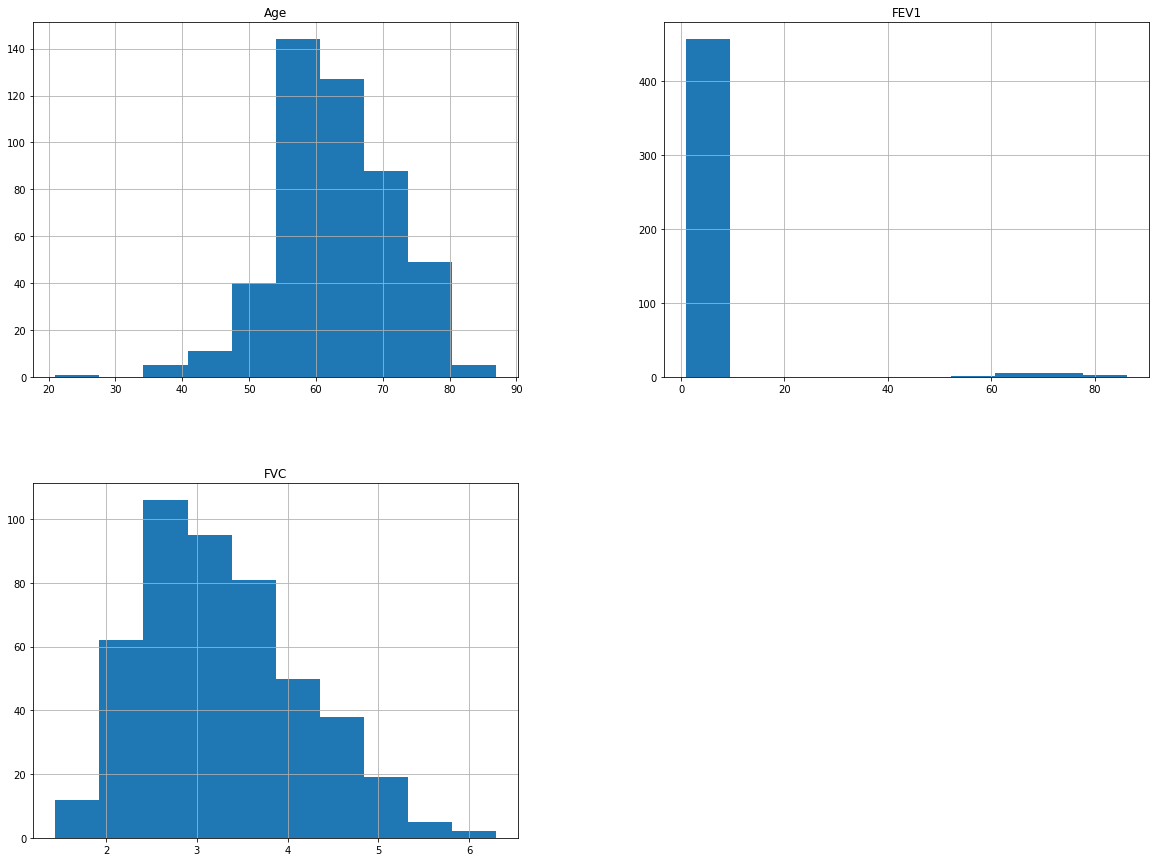

In [199]:
df.hist(figsize=(20,15))

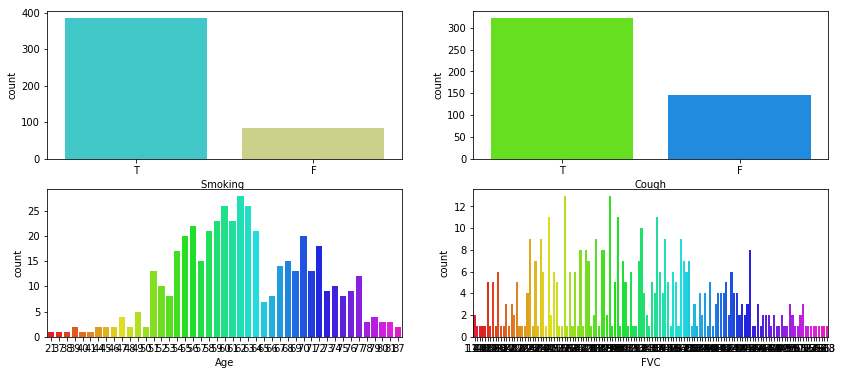

In [200]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=df,x='Smoking ',palette='rainbow',ax=ax1)
sns.countplot(data=df,x='Cough',palette='gist_rainbow',ax=ax2)
sns.countplot(data=df,x='Age',palette='gist_rainbow',ax=ax3)
sns.countplot(data=df,x='FVC',palette='gist_rainbow',ax=ax4)




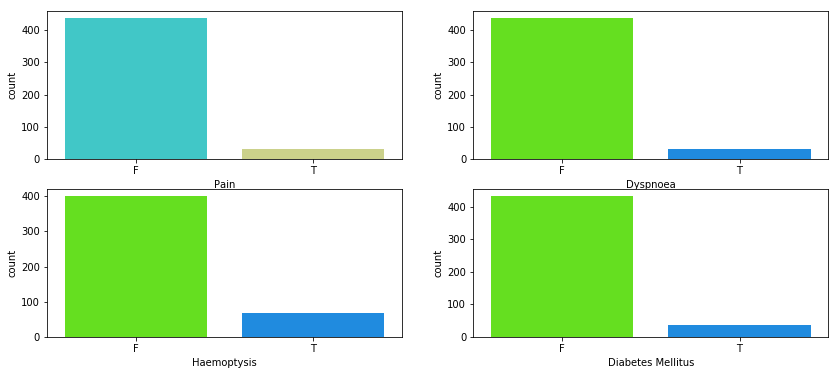

In [201]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=df,x='Pain',palette='rainbow',ax=ax1)
sns.countplot(data=df,x='Dyspnoea',palette='gist_rainbow',ax=ax2)
sns.countplot(data=df,x='Haemoptysis',palette='gist_rainbow',ax=ax3)
sns.countplot(data=df,x='Diabetes Mellitus',palette='gist_rainbow',ax=ax4)


In [202]:
df[[ 'FVC', 'FEV1', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Diabetes Mellitus',
       'Heart Attack in 6 mos', 'PAD', 'Smoking ', 'Asthma', 'Age',
       'DeathIn1yr']] = (df[[ 'FVC', 'FEV1', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Diabetes Mellitus',
       'Heart Attack in 6 mos', 'PAD', 'Smoking ', 'Asthma', 'Age',
       'DeathIn1yr']] == 'T').astype(int)

C:\Users\Sowmya\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [203]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor Size,Diabetes Mellitus,Heart Attack in 6 mos,PAD,Smoking,Asthma,Age,DeathIn1yr
0,DGN2,0,0,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,0,0
1,DGN3,0,0,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,0,0
2,DGN3,0,0,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,0,0
3,DGN3,0,0,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,0,0
4,DGN3,0,0,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,0,1


In [216]:
live = df[df['DeathIn1yr'] == 0]
death = df[df['DeathIn1yr'] == 1]

cond = ['FVC', 'FEV1', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
     'Diabetes Mellitus', 'Heart Attack in 6 mos', 'PAD', 'Smoking ', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.DeathIn1yr)*100))
ld

Death: 70, Live: 400
1 year death: 14.89% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,0.0000,0.000000
FEV1,0.0000,0.000000
Pain,0.0600,0.100000
Haemoptysis,0.1350,0.200000
Dyspnoea,0.0550,0.128571
Cough,0.6700,0.785714
Weakness,0.1525,0.242857
Diabetes Mellitus,0.0625,0.142857
Heart Attack in 6 mos,0.0050,0.000000


In [208]:
# Percentage difference in means of live vs death patients
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

                                      

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes Mellitus', 'Heart Attack in 6 mos', 'PAD', 'Smoking ', 'Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=18)

plt.tight_layout()

plt.show()

C:\Users\Sowmya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


<Figure size 432x288 with 0 Axes>

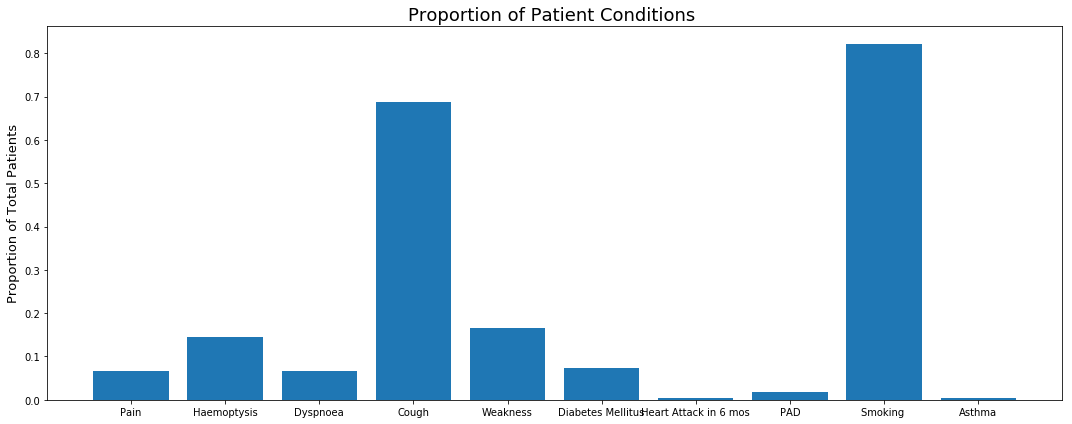

In [217]:
fig=plt.figure(figsize=(15,6))
tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes Mellitus', 'Heart Attack in 6 mos', 'PAD', 'Smoking ', 'Asthma']
tf_sum = [df[col].sum()/470 for col in tf_col]

plt.bar(tf_col, tf_sum)
plt.xticks(tf_col)
#plt.xticklabels(tf_col, rotation=90)
plt.ylabel('Proportion of Total Patients', fontsize=13)
plt.title('Proportion of Patient Conditions ', fontsize=18)

plt.tight_layout()

plt.show()